In [157]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Read data from the Excel file
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
# Display the first 5 rows of the dataset
print(df.head())
# Check for missing values in the dataset
print(df.isnull().sum())
# Display basic information about the dataset (column types, memory usage, etc.)
print(df.info())

  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome State                Ethnicity  ...  \
0            Sales                27    IL                    White  ...   
1            Sales                23    CA                    White  ...   
2  Human Resources                29    CA  Asian or Asian American  ...   
3       Technology                12    IL                    White  ...   
4  Human Resources                29    CA                    White  ...   

   MaritalStatus  Salary StockOptionLevel OverTime   HireDate  Attrition  \
0       Divorced  102059                1       No 2

---

 **_2.Geographic Insights:_**
#### 18.Is there a correlation between overtime work and performance or attrition?
> Approach: We'll analyze the relationship between `OverTime` and `Attrition` (since PerformanceRating doesn't exist, we focus on Attrition).

Correlation between OverTime and Attrition:
           OverTime  Attrition
OverTime   1.000000   0.246118
Attrition  0.246118   1.000000


/tmp/ipykernel_8008/706550115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')


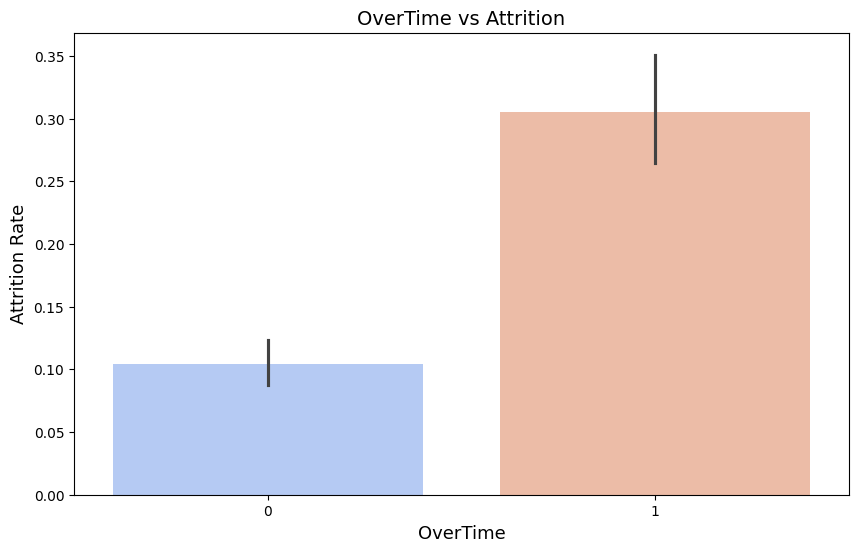

In [67]:
# Convert OverTime and Attrition to numeric values for correlation
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate correlation between OverTime and Attrition
correlation = df[['OverTime', 'Attrition']].corr()
print(f"Correlation between OverTime and Attrition:\n{correlation}")


# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')
plt.title('OverTime vs Attrition', fontsize=14)
plt.xlabel('OverTime', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()

---
#### 19.How does business travel affect employee satisfaction and retention?
>Since there is no explicit "Satisfaction" column, we’ll focus on `Attrition` and `BusinessTravel`. We'll examine if employees who travel more frequently for business are more likely to leave the company.

Attrition Rate by Business Travel:
BusinessTravel
Frequent Traveller    0.249097
No Travel             0.080000
Some Travel           0.149569
Name: Attrition, dtype: float64


/tmp/ipykernel_8008/265498683.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=business_travel_attrition.index, y=business_travel_attrition.values, palette='Set1')


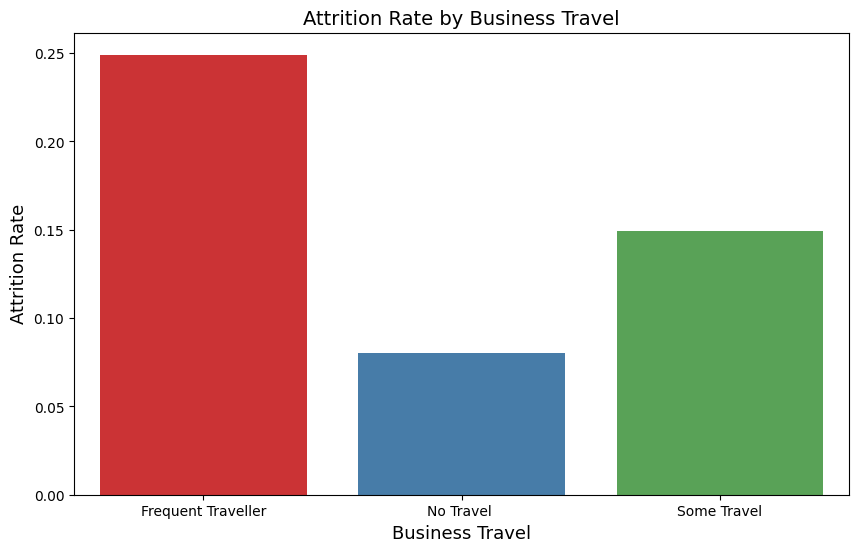

In [111]:
># Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by BusinessTravel to calculate the attrition rate
business_travel_attrition = df.groupby('BusinessTravel')['Attrition'].mean()

# Print the attrition rates
print(f"Attrition Rate by Business Travel:\n{business_travel_attrition}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=business_travel_attrition.index, y=business_travel_attrition.values, palette='Set1')
plt.title('Attrition Rate by Business Travel', fontsize=14)
plt.xlabel('Business Travel', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()


---
#### 20.How does the distance from home affect job satisfaction?
>Since there is no explicit statement of “PerformanceRating” in the data, we will focus on two columns: `DistanceFromHome` and `YearsInMostRecentRole`. We will look at the ratios between the distance an employee travels to work and their years of experience in their current role.

Correlation between Distance from Home and Years in Most Recent Role:
                       DistanceFromHome  YearsInMostRecentRole
DistanceFromHome               1.000000              -0.031279
YearsInMostRecentRole         -0.031279               1.000000


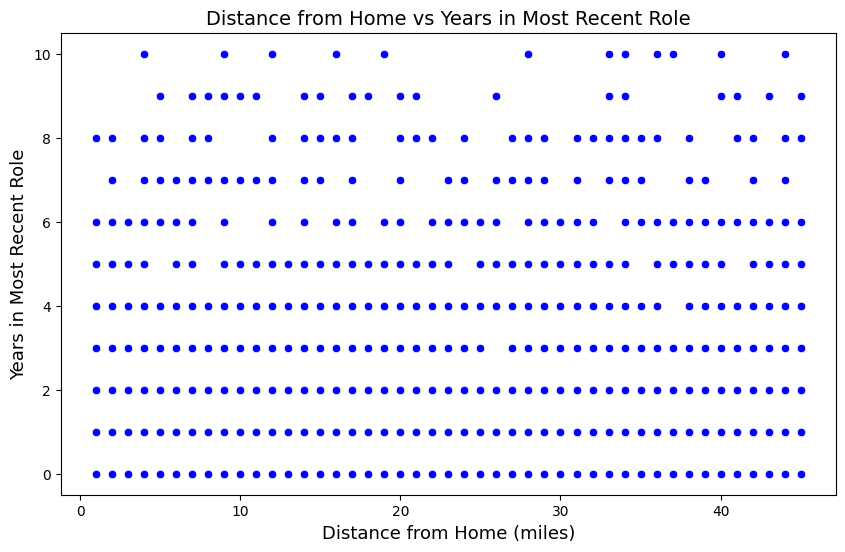

In [131]:
# Calculate correlation between DistanceFromHome and YearsInMostRecentRole
distance_performance_correlation = df[['DistanceFromHome', 'YearsInMostRecentRole']].corr()
print(f"Correlation between Distance from Home and Years in Most Recent Role:\n{distance_performance_correlation}")

# Scatter plot to observe the relationship between DistanceFromHome and YearsInMostRecentRole
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromHome', y='YearsInMostRecentRole', data=df, color='blue')
plt.title('Distance from Home vs Years in Most Recent Role', fontsize=14)
plt.xlabel('Distance from Home (miles)', fontsize=13)
plt.ylabel('Years in Most Recent Role', fontsize=13)
plt.show()


---
#### 21.Which states have the highest and lowest attrition rates?
>We’ll group by the `State` column and calculate the attrition rate for each state.

Attrition Rate by State:
State
NY    0.138425
IL    0.147727
CA    0.174857
Name: Attrition, dtype: float64


/tmp/ipykernel_8008/324323264.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_attrition.index, y=state_attrition.values, palette='viridis')


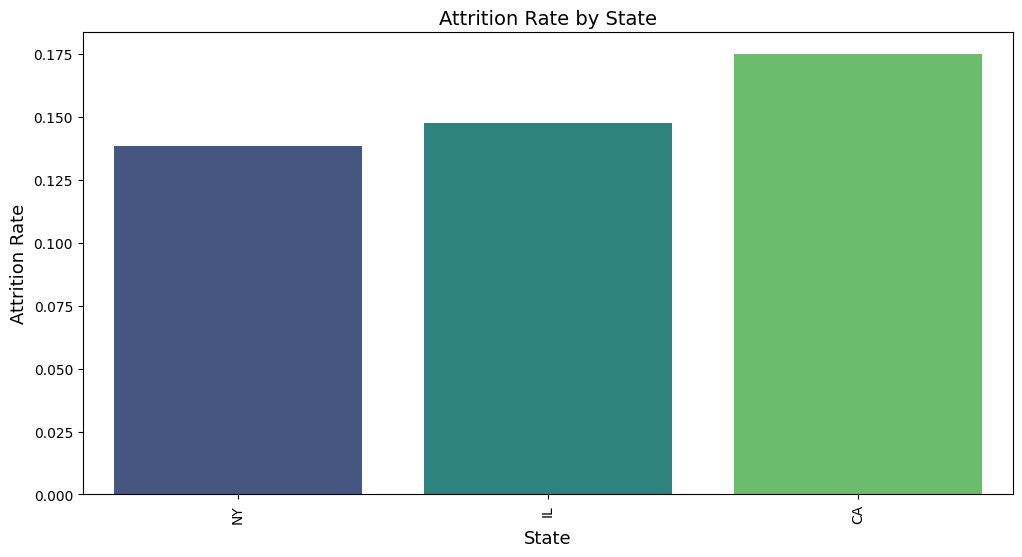

In [135]:
# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by State and calculate the attrition rate
state_attrition = df.groupby('State')['Attrition'].mean().sort_values()

# Print the attrition rates by state
print(f"Attrition Rate by State:\n{state_attrition}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=state_attrition.index, y=state_attrition.values, palette='viridis')
plt.title('Attrition Rate by State', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()


---
#### 22.Which states have the highest percentage of employees leaving due to excessive overtime?
>We can filter for employees who work overtime and then group by state to compute the `attrition` rate among `overtime` workers.

Overtime Attrition Rate by State:
State
IL    0.270833
NY    0.288136
CA    0.320000
Name: Attrition, dtype: float64


/tmp/ipykernel_8008/71913584.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='Blues')


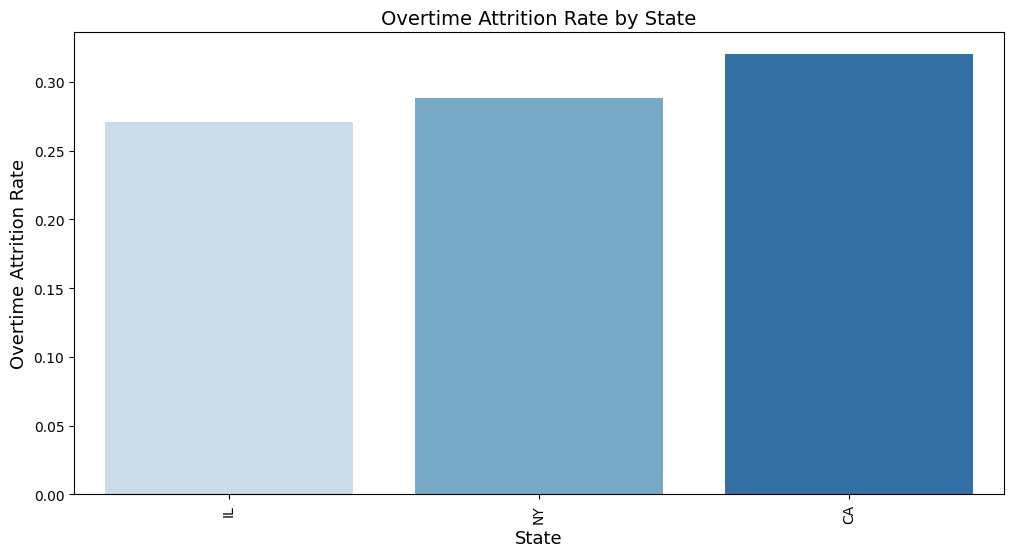

In [158]:
# Convert 'OverTime' and 'Attrition' columns to numeric (1 for 'Yes', 0 for 'No')
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Filter for employees who work overtime and calculate attrition rate by state
overtime_attrition = df[df['OverTime'] == 1].groupby('State')['Attrition'].mean().sort_values()

print(f"Overtime Attrition Rate by State:\n{overtime_attrition}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='Blues')
plt.title('Overtime Attrition Rate by State', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Overtime Attrition Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()


---
**_3. Psychographic Insights:_**
#### 23.How does work-life balance affect overall job satisfaction?
>Since we don’t have JobSatisfaction, we can analyze how DistanceFromHome relates to PerformanceRating or Attrition.

In [159]:
# Scatter plot to observe the relationship between DistanceFromHome and PerformanceRating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromHome', y='PerformanceRating', data=df, color='blue')
plt.title('Distance from Home vs Performance Rating', fontsize=14)
plt.xlabel('Distance from Home (miles)', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()

# Calculate correlation between DistanceFromHome and PerformanceRating
distance_performance_correlation = df[['DistanceFromHome', 'PerformanceRating']].corr()
print(f"Correlation between Distance from Home and Performance Rating:\n{distance_performance_correlation}")

ValueError: Could not interpret value `PerformanceRating` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

---
#### 24.Is there a relationship between work-life balance and business travel frequency?
>We can use `OverTime` to represent work-life balance and check how it correlates with `BusinessTravel`.

Work-Life Balance (OverTime) vs Business Travel Frequency:
BusinessTravel  Frequent Traveller  No Travel   Some Travel
OverTime                                                   
0                         0.181214    0.109108     0.709677
1                         0.206731    0.084135     0.709135


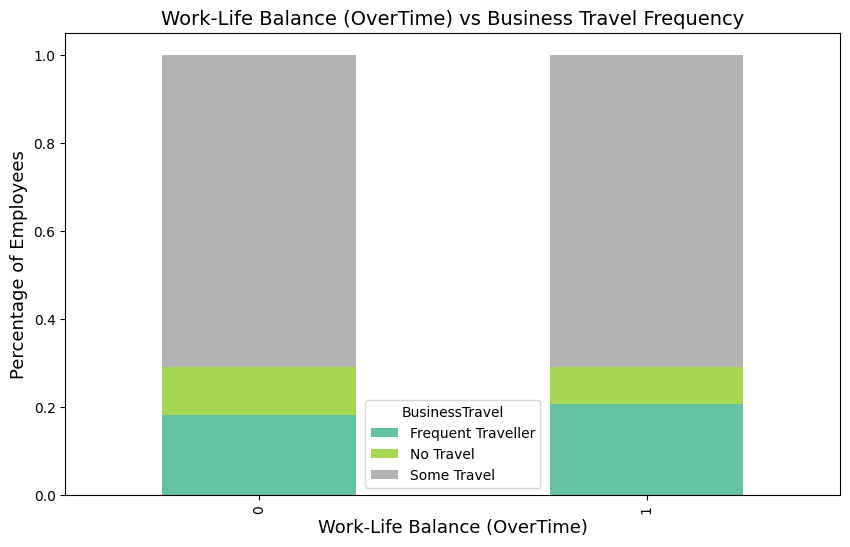

In [160]:
# Group by OverTime and BusinessTravel
overtime_travel = pd.crosstab(df['OverTime'], df['BusinessTravel'], normalize='index')

print(f"Work-Life Balance (OverTime) vs Business Travel Frequency:\n{overtime_travel}")

# Visualization
overtime_travel.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Work-Life Balance (OverTime) vs Business Travel Frequency', fontsize=14)
plt.xlabel('Work-Life Balance (OverTime)', fontsize=13)
plt.ylabel('Percentage of Employees', fontsize=13)
plt.show()

---
#### 25.How does participation in training programs impact employee performance?
>des

In [ ]:
# 25.How does participation in training programs impact employee performance?

---
#### 26.Is there a connection between training and job satisfaction or promotion rates?
>des

In [ ]:
# 26.Is there a connection between training and job satisfaction or promotion rates?

---
**_4. Behavioral Insights:_**
#### 27.What are the trends in performance ratings across departments and demographics?
>We will analyze how `PerformanceRating` varies across `Department` and `Gender`.


In [ ]:
# Performance ratings by department
dept_performance = df.groupby('Department')['PerformanceRating'].mean()
print(f"Performance Rating by Department:\n{dept_performance}")

# Performance ratings by gender
gender_performance = df.groupby('Gender')['PerformanceRating'].mean()
print(f"Performance Rating by Gender:\n{gender_performance}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_performance.index, y=dept_performance.values, palette='viridis')
plt.title('Performance Rating by Department', fontsize=14)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_performance.index, y=gender_performance.values, palette='magma')
plt.title('Performance Rating by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()

---
#### 28.How does tenure (YearsAtCompany) impact performance and promotion rates?
>To examine this, we can analyze how `YearsAtCompany` affects both `PerformanceRating` and `YearsSinceLastPromotion`.

In [ ]:
# Group by 'YearsAtCompany' and calculate average performance rating and average years since last promotion
tenure_performance = df.groupby('YearsAtCompany')['PerformanceRating'].mean()
tenure_promotion = df.groupby('YearsAtCompany')['YearsSinceLastPromotion'].mean()

print(f"Average Performance Rating by Tenure (YearsAtCompany):\n{tenure_performance}")
print(f"Average Years Since Last Promotion by Tenure (YearsAtCompany):\n{tenure_promotion}")

# Visualization for performance rating vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_performance.index, y=tenure_performance.values, marker='o', color='blue')
plt.title('Average Performance Rating by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()

# Visualization for years since last promotion vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_promotion.index, y=tenure_promotion.values, marker='o', color='green')
plt.title('Average Years Since Last Promotion by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.show()

---
#### 29.What is the average time to promotion for employees, and does it vary by department or gender?
>We'll calculate the average YearsSinceLastPromotion and group the data by Department and Gender.

Average Time to Promotion by Department:
Department
Human Resources    3.285714
Sales              3.260090
Technology         3.534860
Name: YearsSinceLastPromotion, dtype: float64
Average Time to Promotion by Gender:
Gender
Female               3.542222
Male                 3.271889
Non-Binary           3.830645
Prefer Not To Say    3.100000
Name: YearsSinceLastPromotion, dtype: float64


/tmp/ipykernel_8008/1808088067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')


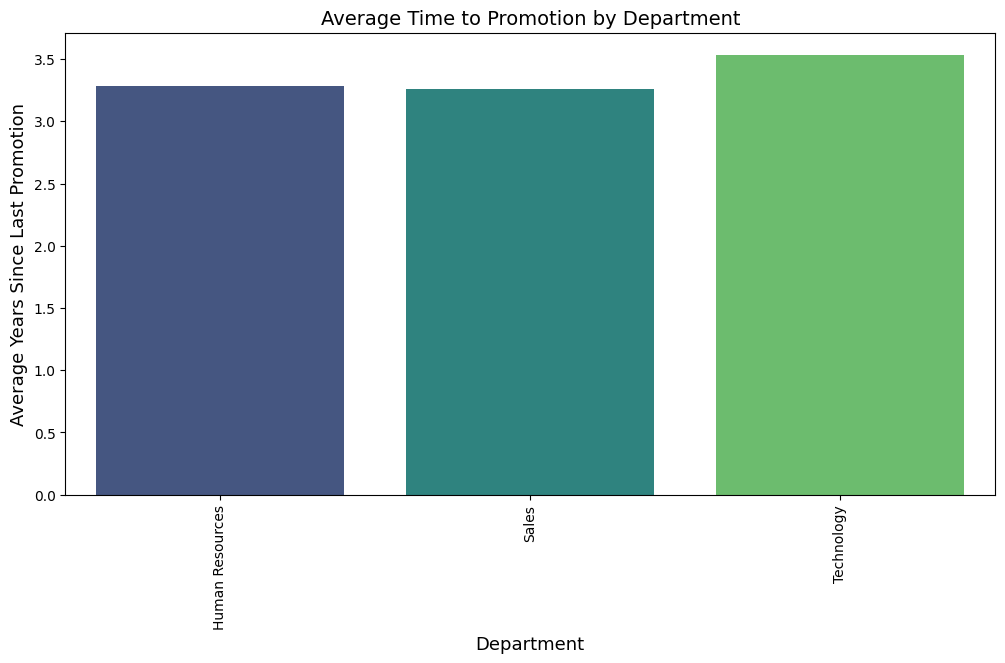

/tmp/ipykernel_8008/1808088067.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')


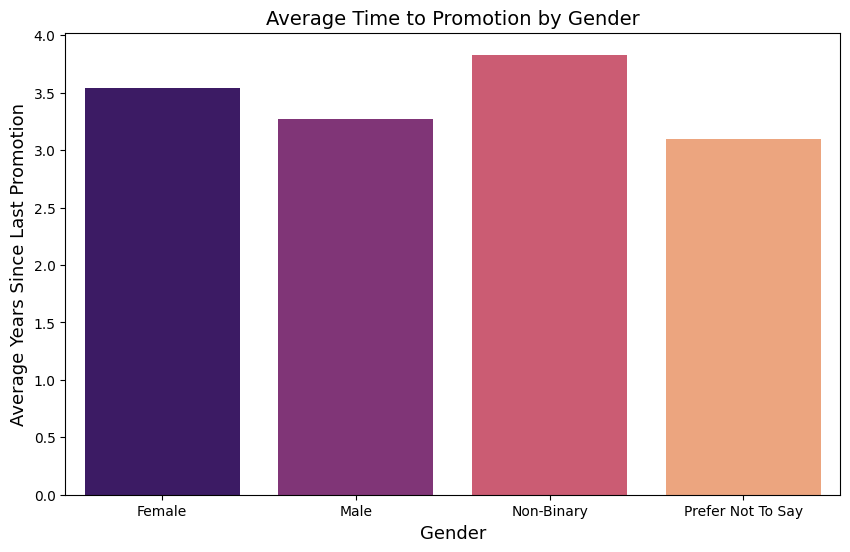

In [162]:
# Average time to promotion (YearsSinceLastPromotion) by Department
dept_promotion_time = df.groupby('Department')['YearsSinceLastPromotion'].mean()

# Average time to promotion by Gender
gender_promotion_time = df.groupby('Gender')['YearsSinceLastPromotion'].mean()

print(f"Average Time to Promotion by Department:\n{dept_promotion_time}")
print(f"Average Time to Promotion by Gender:\n{gender_promotion_time}")

# Visualization for average time to promotion by department
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')
plt.title('Average Time to Promotion by Department', fontsize=14)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.xticks(rotation=90)
plt.show()

# Visualization for average time to promotion by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')
plt.title('Average Time to Promotion by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.show()

---
#### 30.Are employees with longer tenure more likely to have higher performance ratings?
>We can check if there's a correlation between `YearsAtCompany` and `PerformanceRating`.

In [ ]:
# Calculate the correlation between tenure (YearsAtCompany) and performance rating
tenure_performance_correlation = df[['YearsAtCompany', 'PerformanceRating']].corr()

print(f"Correlation between Years at Company and Performance Rating:\n{tenure_performance_correlation}")

# Visualization for relationship between tenure and performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='PerformanceRating', data=df, color='purple')
plt.title('Tenure vs Performance Rating', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()

---
#### 31.How does performance rating correlate with job satisfaction?
>As we do not have an explicit `JobSatisfaction` column, we can use `PerformanceRating` as a proxy and check its correlation with `Attrition` (assuming employees with higher ratings might be less likely to leave).

In [ ]:
# Calculate the correlation between performance rating and attrition
performance_attrition_correlation = df[['PerformanceRating', 'Attrition']].corr()

print(f"Correlation between Performance Rating and Attrition:\n{performance_attrition_correlation}")

# Visualization for performance rating vs attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PerformanceRating', data=df, palette='coolwarm')
plt.title('Performance Rating vs Attrition', fontsize=14)
plt.xlabel('Attrition', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()

---
#### 32.What is the attrition rate for employees with different performance ratings?
>We can group the data by `PerformanceRating` and calculate the attrition rate for each rating level.

In [ ]:
# Group by performance rating and calculate attrition rate
performance_attrition_rate = df.groupby('PerformanceRating')['Attrition'].mean()

print(f"Attrition Rate by Performance Rating:\n{performance_attrition_rate}")

# Visualization for attrition rate by performance rating
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')
plt.title('Attrition Rate by Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()

---
#### 33.What is the impact of overtime on job satisfaction?
>Since we do not have a direct measure of job satisfaction, we can analyze the impact of `OverTime` on `PerformanceRating` and use that as a proxy for satisfaction.

In [ ]:
# Group by 'OverTime' to calculate average performance rating (as a proxy for job satisfaction)
overtime_performance = df.groupby('OverTime')['PerformanceRating'].mean()

print(f"Performance Rating by Overtime (as a proxy for Job Satisfaction):\n{overtime_performance}")

# Visualization for performance rating by overtime
plt.figure(figsize=(10, 6))
sns.barplot(x=overtime_performance.index, y=overtime_performance.values, palette='Set2')
plt.title('Performance Rating by Overtime (as proxy for Job Satisfaction)', fontsize=14)
plt.xlabel('Overtime', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()

---
#### 34.Is there a relationship between overtime and performance?
>des

---
#### 35.Can we predict the likelihood of attrition based on employee attributes?
>18. Can we predict the likelihood of attrition based on employee attributes?
We can create a predictive model to determine the likelihood of attrition (`Attrition`) using attributes like `YearsAtCompany`, `OverTime`, `PerformanceRating`, etc.

We'll use Logistic Regression for this predictive task.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = df[['YearsAtCompany', 'OverTime', 'PerformanceRating']]
X['OverTime'] = X['OverTime'].map({'Yes': 1, 'No': 0})
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix for Attrition Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

---
#### 36.Are there any leading indicators of high-performing employees?
>We can try to identify features that predict high performance (`PerformanceRating`).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = df[['YearsAtCompany', 'OverTime', 'PerformanceRating']]
X['OverTime'] = X['OverTime'].map({'Yes': 1, 'No': 0})
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix for Attrition Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()